# **Análisis contaminantes registrados**

*Nota: hacer el trabajo con el nuevo conjunto de datos llamado "CSV_Datos_Ok.csv"*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
datosContaminantes = pd.read_csv("CSV_Datos_OK.csv", parse_dates={"Fecha":["Año", "Mes", "Día"]})
datosContaminantes = datosContaminantes.drop(["Minuto", "Segundo"], axis=1)
datosContaminantes

,Fecha,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,12,43.0000,1,1,12,pm25
1,2012-11-27,13,22.0000,1,1,12,pm25
2,2012-11-27,14,31.0000,1,1,12,pm25
3,2012-11-27,15,29.0000,1,1,12,pm25
4,2012-11-27,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...
1185035,2022-07-31,19,10.6495,1,1,86,pm25
1185036,2022-07-31,20,9.4167,1,1,86,pm25
1185037,2022-07-31,21,15.2623,1,1,86,pm25
1185038,2022-07-31,22,16.4119,1,1,86,pm25


In [3]:
# Funcion para convertir valores str en float
def ToFloat(df):
    if isinstance(df, str):
        if df.count('.') == 2:
            return float( df.replace('.', '', 1) )
        else:
            return float(df)
    else:
        return float(df)

# Funcion para extraer los dias de la semana
def DayOfWeek(df):
    return df.strftime('%A')

In [4]:
# Reemplazando valores en la columna a aplicar la funcion ToFloat
datosContaminantes["valor_contaminante"] = datosContaminantes["valor_contaminante"].apply(ToFloat)

# insertando los dias
datosContaminantes.insert(1, "Dia_Semana", np.array( datosContaminantes["Fecha"].apply(DayOfWeek) ) )

datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,Tuesday,12,43.0000,1,1,12,pm25
1,2012-11-27,Tuesday,13,22.0000,1,1,12,pm25
2,2012-11-27,Tuesday,14,31.0000,1,1,12,pm25
3,2012-11-27,Tuesday,15,29.0000,1,1,12,pm25
4,2012-11-27,Tuesday,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1185035,2022-07-31,Sunday,19,10.6495,1,1,86,pm25
1185036,2022-07-31,Sunday,20,9.4167,1,1,86,pm25
1185037,2022-07-31,Sunday,21,15.2623,1,1,86,pm25
1185038,2022-07-31,Sunday,22,16.4119,1,1,86,pm25


Arreglamos los datos que presenten inconsistencias, ordenamos de menor a mayor por fechas y borramos columna de índice duplicada tras la última operación:

In [5]:
datosContaminantes = datosContaminantes[(datosContaminantes["valor_contaminante"] >= 0.0) & \
                                        (datosContaminantes["valor_contaminante"] != 999.0) & \
                                        (datosContaminantes["calidad_contaminante"] != 151)]
datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,Tuesday,12,43.0000,1,1,12,pm25
1,2012-11-27,Tuesday,13,22.0000,1,1,12,pm25
2,2012-11-27,Tuesday,14,31.0000,1,1,12,pm25
3,2012-11-27,Tuesday,15,29.0000,1,1,12,pm25
4,2012-11-27,Tuesday,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1185035,2022-07-31,Sunday,19,10.6495,1,1,86,pm25
1185036,2022-07-31,Sunday,20,9.4167,1,1,86,pm25
1185037,2022-07-31,Sunday,21,15.2623,1,1,86,pm25
1185038,2022-07-31,Sunday,22,16.4119,1,1,86,pm25


In [6]:
datosContaminantes = datosContaminantes.sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)
datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-18,Tuesday,12,16.0000,1,1,25,pm25
1,2012-09-18,Tuesday,13,18.0000,1,1,25,pm25
2,2012-09-18,Tuesday,14,18.0000,1,1,25,pm25
3,2012-09-18,Tuesday,15,17.0000,1,1,25,pm25
4,2012-09-18,Tuesday,16,17.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...
1185035,2022-08-31,Wednesday,19,113.3006,1,1,6,nox
1185036,2022-08-31,Wednesday,20,46.5652,1,1,6,nox
1185037,2022-08-31,Wednesday,21,51.3882,1,1,6,nox
1185038,2022-08-31,Wednesday,22,88.6126,1,1,6,nox


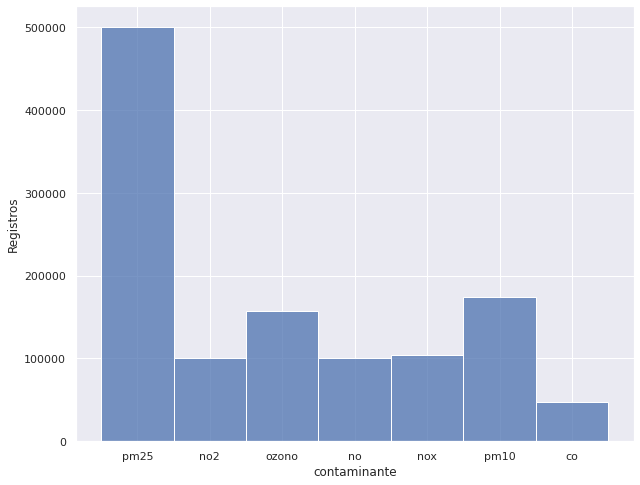

In [48]:
sns.set_theme(style='dark')
sns.color_palette("dark:salmon_r", as_cmap=True)

sns.histplot(data=datosContaminantes, x="contaminante")

plt.ylabel('Registros')
sns.set(rc={'figure.figsize':(9, 8)})

#plt.savefig('registros_contaminantes.png', bbox_inches='tight', dpi=200)
plt.grid(); plt.show()

## **Muestra aleatoria de tamaño definido**

Se ha elegido un tamaño de muestra representativo de $n=1600$ datos

In [8]:
muestraContaminantes = datosContaminantes.sample(n=1600)  # muestra aleatoria de tamaño 1600
muestraContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
944321,2020-11-10,Tuesday,2,2.4278,1,1,85,pm25
613900,2018-12-19,Wednesday,15,18.8813,1,1,6,nox
374934,2017-09-21,Thursday,16,10.0000,1,1,6,co
12605,2013-07-27,Saturday,5,27.0000,1,1,12,pm25
927275,2020-09-30,Wednesday,23,33.0000,1,1,6,pm10
...,...,...,...,...,...,...,...,...
522023,2018-06-28,Thursday,4,12.0000,1,1,25,pm25
55059,2015-02-14,Saturday,4,38.0000,1,1,25,no
772311,2019-10-24,Thursday,9,18.0000,1,1,25,pm25
166661,2016-02-21,Sunday,2,28.0000,1,1,25,no2


In [9]:
# ordenar los valores de la muestra
muestraContaminantes = muestraContaminantes.sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)
muestraContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-20,Thursday,13,35.0000,1,1,25,pm25
1,2012-12-06,Thursday,23,19.0000,1,1,25,pm25
2,2013-01-03,Thursday,15,35.0000,1,1,12,pm25
3,2013-01-30,Wednesday,14,58.0000,1,1,12,pm25
4,2013-02-05,Tuesday,3,30.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...
1595,2022-07-27,Wednesday,8,14.2548,1,1,84,pm25
1596,2022-07-28,Thursday,10,19.0676,1,1,84,pm25
1597,2022-07-29,Friday,2,10.5268,1,1,79,pm25
1598,2022-07-30,Saturday,10,25.0000,1,1,12,pm25


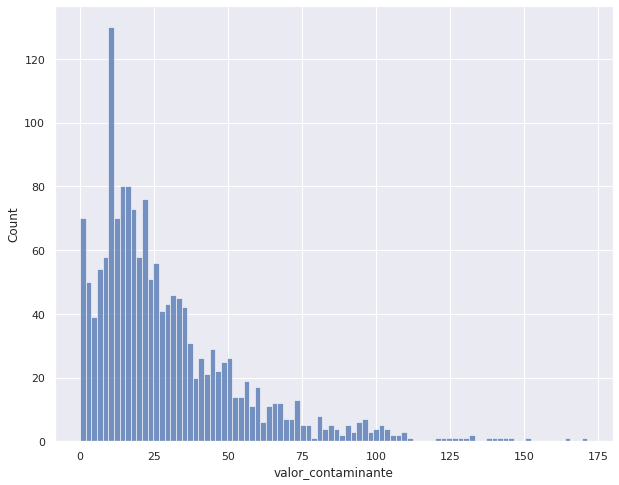

In [50]:
sns.set_theme(style='dark')

sns.histplot(muestraContaminantes, x='valor_contaminante', bins=90)
sns.set(rc={'figure.figsize':(11, 8)}); plt.grid(); plt.show()

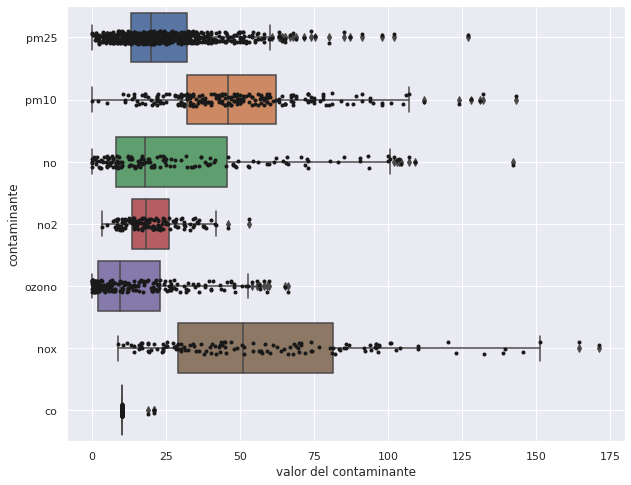

In [56]:
sns.set_theme(style='dark')

sns.boxplot(data=muestraContaminantes, x='valor_contaminante', y='contaminante')

sns.stripplot(data=muestraContaminantes, x='valor_contaminante', y='contaminante',
              size=4, color='k', linewidth=0)

sns.set(rc={'figure.figsize':(10, 8)})
plt.xlabel("valor del contaminante"); plt.grid()

# para guardar el plot:
#plt.savefig('boxplots_contaminantes.png', bbox_inches='tight', dpi=200)

plt.show()

## **Contaminante pm2.5 para la muestra aleatoria**

Veamos la distribución del contaminante pm2.5 para la muestra aleatoria extraída de tamaño $n=1000$ representando los datos mediante un diagrama de cajas y bigotes

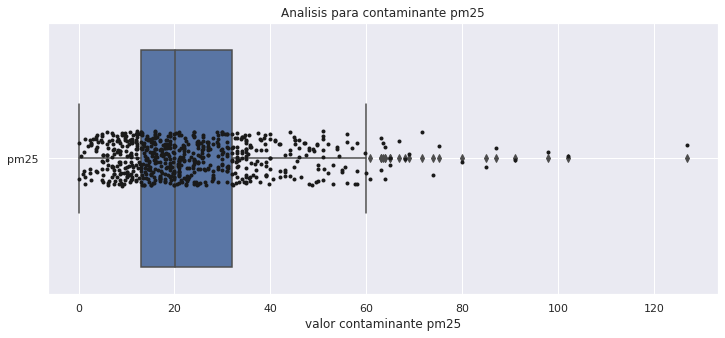

In [58]:
sns.set_theme(style='dark')

sns.boxplot(data=muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ], x='valor_contaminante', y='contaminante')

sns.stripplot(data=muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ], x='valor_contaminante', y='contaminante',
              size=4, color='k', linewidth=0)

sns.set(rc={'figure.figsize':(12, 5)})

plt.title("Analisis para contaminante pm25"); plt.ylabel(''); plt.xlabel('valor contaminante pm25'); plt.grid()

# para guardar el plot
#plt.savefig("boxplot_pm25.png", bbox_inches='tight', dpi=200)

plt.show()

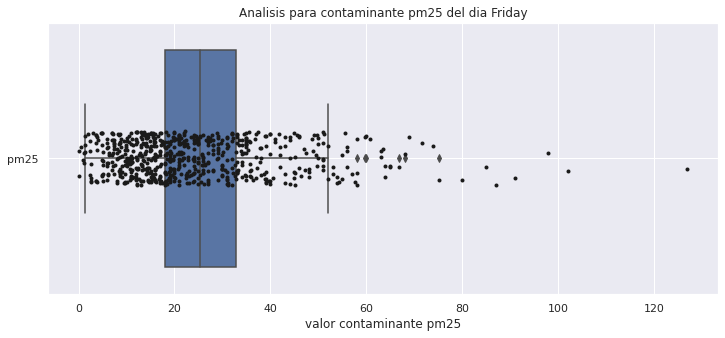

In [13]:
dia = 'Friday'

sns.set_theme(style='dark')

sns.boxplot(data=muestraContaminantes[ (muestraContaminantes['contaminante'] == 'pm25') & \
                                       (muestraContaminantes['Dia_Semana'] == dia) ],
            x='valor_contaminante', y='contaminante')

sns.stripplot(data=muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ],
              x='valor_contaminante',
              y='contaminante',
              size=4, color='k', linewidth=0)

sns.set(rc={'figure.figsize':(12, 6)})

plt.title(f"Analisis para contaminante pm25 del dia {dia}")
plt.ylabel(''); plt.xlabel('valor contaminante pm25'); plt.grid(); plt.show()

# **Comportamiento en el tiempo de los contaminantes**

* ### **PM25**

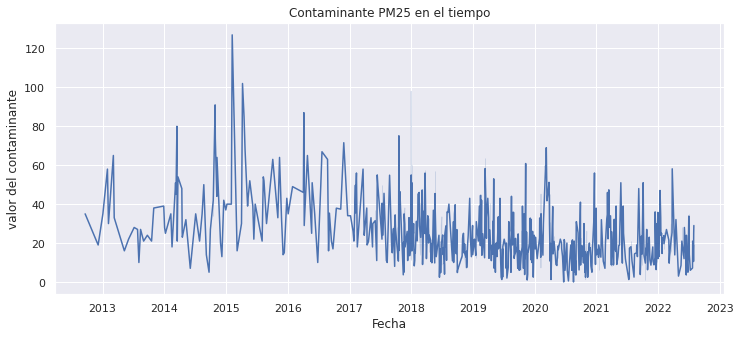

In [59]:
sns.lineplot(
    data = muestraContaminantes[muestraContaminantes["contaminante"] == "pm25"],
    x = "Fecha",
    y = "valor_contaminante"
    )

plt.title("Contaminante PM25 en el tiempo"); plt.ylabel("valor del contaminante")

# para guardar el plot
#plt.savefig("muestraPM25_tiempo.png", bbox_inches='tight', dpi=200)

plt.show()

## **Tendencia**

Para visualizar con mejor detalle lo que sucede en términos de la tendencia del contaminante, veamos con una linea de tendencia los datos en su forma de dispersión

In [15]:
def toTimestamp(df):
    return datetime.timestamp(df)

Para calcular la linea de tendencia, es necesario que los datos en el eje x sean de tipo `timestamp`, de esta forma los calculos serán permitidos y podremos determinar el orden de ajuste.

In [16]:
# para calcular la linea de tendencia se requieren datos tipo
# 'timestamp' en el eje x
muestraFechaTimestamp = muestraContaminantes.copy()
muestraFechaTimestamp["Fecha"] = muestraFechaTimestamp["Fecha"].apply(toTimestamp)

muestraFechaTimestamp

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,1.348117e+09,Thursday,13,35.0000,1,1,25,pm25
1,1.354770e+09,Thursday,23,19.0000,1,1,25,pm25
2,1.357189e+09,Thursday,15,35.0000,1,1,12,pm25
3,1.359522e+09,Wednesday,14,58.0000,1,1,12,pm25
4,1.360040e+09,Tuesday,3,30.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...
1595,1.658898e+09,Wednesday,8,14.2548,1,1,84,pm25
1596,1.658984e+09,Thursday,10,19.0676,1,1,84,pm25
1597,1.659071e+09,Friday,2,10.5268,1,1,79,pm25
1598,1.659157e+09,Saturday,10,25.0000,1,1,12,pm25


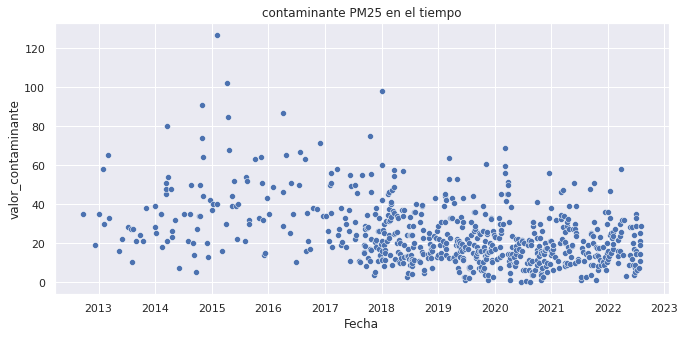

In [17]:
sns.set(rc={'figure.figsize':(11, 5)})

sns.scatterplot(
    data=muestraContaminantes[muestraContaminantes["contaminante"] == "pm25"],
    x="Fecha",
    y="valor_contaminante")

plt.title("contaminante PM25 en el tiempo"); plt.show()

Veamos, para los distintos contaminantes, una linea de tendencia que se ajuste a los datos, para un orden y un contaminante determinado con la siguiente función que permite graficar estos datos:

In [61]:
def scatterFit(contaminante, ordenAjuste=1, save=False):

    # dispersion y linea de tendencia para los datos con timestamp
    sns.regplot(
        data=muestraFechaTimestamp[muestraFechaTimestamp["contaminante"] == contaminante],
        x="Fecha",
        y="valor_contaminante",
        line_kws={"color": "orange"},
        order=ordenAjuste  # orden del ajuste
    )

    # configurar las fechas como datetime para el eje x
    ax = plt.gca()
    xticks = ax.get_xticks()
    xticks_dates = [datetime.fromtimestamp(x).strftime('%Y-%m') for x in xticks]
    ax.set_xticklabels(xticks_dates)

    plt.title(f"contaminante {contaminante} en el tiempo")

    sns.set(rc={'figure.figsize':(11, 5)})

    if save == True:
        plt.savefig(f'trendline{contaminante}.png', bbox_inches='tight', dpi=200)
    
    plt.show()
    
    pass

Veamos los ajustes para cada uno de los contaminantes:

/tmp/ipykernel_713231/1304802717.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


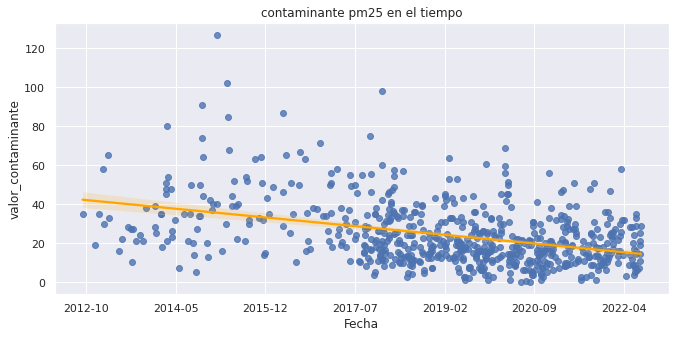

/tmp/ipykernel_713231/1304802717.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


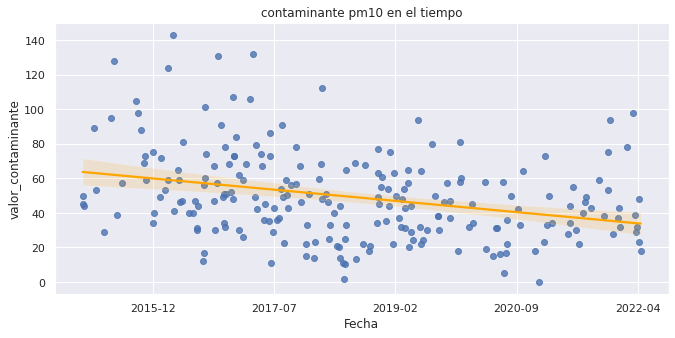

/tmp/ipykernel_713231/1304802717.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


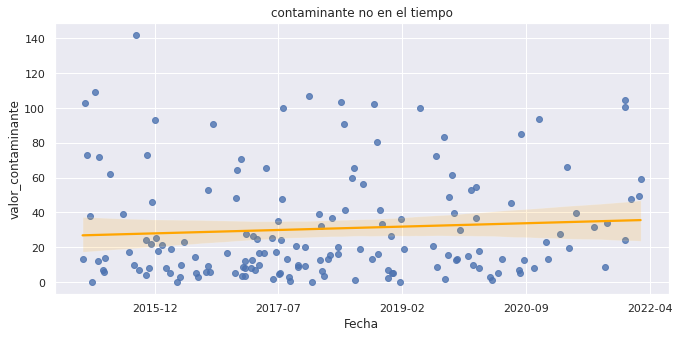

/tmp/ipykernel_713231/1304802717.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


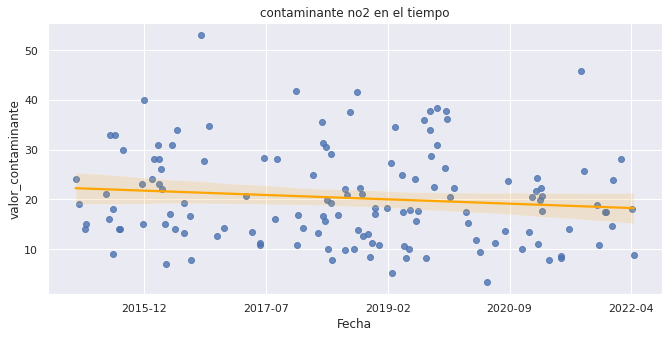

/tmp/ipykernel_713231/1304802717.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


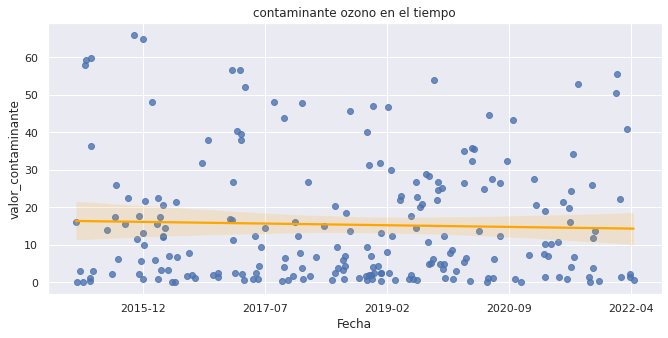

/tmp/ipykernel_713231/1304802717.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


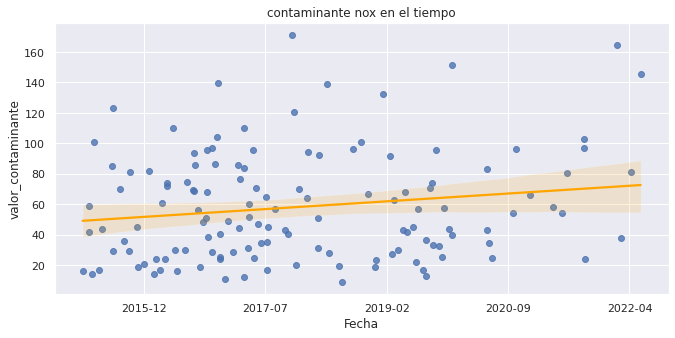

/tmp/ipykernel_713231/1304802717.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


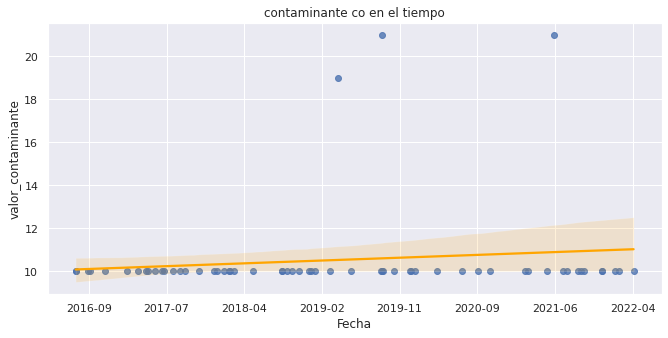

In [64]:
contaminantes = muestraContaminantes["contaminante"].unique()

for cont in contaminantes:
    scatterFit(cont, ordenAjuste=1)

## **Comportamiento por semana**

In [20]:
# obtener las semanas para cada año

def getWeek(df):
    return df.isocalendar()[1]

def getYear(df):
    return df.year

muestraContaminantes.insert( 1, "semana", muestraContaminantes["Fecha"].apply(getWeek) )
muestraContaminantes.insert( 1, "año", muestraContaminantes["Fecha"].apply(getYear) )
muestraContaminantes

,Fecha,año,semana,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-20,2012,38,Thursday,13,35.0000,1,1,25,pm25
1,2012-12-06,2012,49,Thursday,23,19.0000,1,1,25,pm25
2,2013-01-03,2013,1,Thursday,15,35.0000,1,1,12,pm25
3,2013-01-30,2013,5,Wednesday,14,58.0000,1,1,12,pm25
4,2013-02-05,2013,6,Tuesday,3,30.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...,...,...
1595,2022-07-27,2022,30,Wednesday,8,14.2548,1,1,84,pm25
1596,2022-07-28,2022,30,Thursday,10,19.0676,1,1,84,pm25
1597,2022-07-29,2022,30,Friday,2,10.5268,1,1,79,pm25
1598,2022-07-30,2022,30,Saturday,10,25.0000,1,1,12,pm25


Unicamente para el PM25 tendremos:

In [31]:
muestraPM25 = muestraContaminantes[ muestraContaminantes["contaminante"] == "pm25" ]
muestraPM25

,Fecha,año,semana,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-20,2012,38,Thursday,13,35.0000,1,1,25,pm25
1,2012-12-06,2012,49,Thursday,23,19.0000,1,1,25,pm25
2,2013-01-03,2013,1,Thursday,15,35.0000,1,1,12,pm25
3,2013-01-30,2013,5,Wednesday,14,58.0000,1,1,12,pm25
4,2013-02-05,2013,6,Tuesday,3,30.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...,...,...
1595,2022-07-27,2022,30,Wednesday,8,14.2548,1,1,84,pm25
1596,2022-07-28,2022,30,Thursday,10,19.0676,1,1,84,pm25
1597,2022-07-29,2022,30,Friday,2,10.5268,1,1,79,pm25
1598,2022-07-30,2022,30,Saturday,10,25.0000,1,1,12,pm25


Calculando los promedios por estación, para cada semana de cada año:

In [66]:
estaciones = muestraPM25["estacion"].unique()
contaminantes = muestraPM25["contaminante"].unique()
semanas = muestraPM25["semana"].unique()
years = muestraPM25["año"].unique()

In [99]:
promedio_semana = [];  newYears = [];  newSemanas = [];  newEstaciones = []

for year in years:
    for semana in semanas:
        for estacion in estaciones:
            promedio_semana.append(
                np.mean(
                    muestraPM25[
                        (muestraPM25["año"] == year) & \
                        (muestraPM25["semana"] == semana) & \
                        (muestraPM25["estacion"] == estacion)
                    ]["valor_contaminante"]
                )
            )
        newEstaciones += list(estaciones)
        newSemanas += len(estaciones)*[semana]
        newYears += len(estaciones)*[year]

In [127]:
from email.utils import parsedate_to_datetime


prom_muestra_pm25 = {
    "año":newYears,
    "semana":newSemanas,
    "estacion":newEstaciones,
    "promedio_contaminante":promedio_semana
}

prom_muestra_pm25_df = pd.DataFrame(data=prom_muestra_pm25)

prom_muestra_pm25_df = prom_muestra_pm25_df.dropna()

prom_muestra_pm25_df

,año,semana,estacion,promedio_contaminante
0,2012,38,25,35.000
10,2012,49,25,19.000
551,2013,1,12,35.000
561,2013,5,12,58.000
570,2013,6,25,30.000
...,...,...,...,...
5741,2022,29,12,21.000
5747,2022,29,83,7.161
5761,2022,3,12,24.500
5773,2022,22,44,20.000


*Nota: queda pendiente juntar las columnas "año" y "semana", de modo que queden "año-semana"*.